# Lab 3: Supervised Learning

Outlines the methodology and findings of a supervised learning project aimed at predicting new Covid-19-related deaths in Malaysia using various features derived from Covid-19 datasets

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np

In [2]:
# Read file
cases = pd.read_csv("cases_malaysia.csv")
deaths = pd.read_csv("deaths_malaysia.csv")
icu = pd.read_csv("icu.csv")
pkrc = pd.read_csv("pkrc.csv")


## Data Preparation
*Initial Exploration*

In [3]:
cases.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
deaths.head()

,date,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,2,0,2,0,2,0,0,0,0
1,2020-03-18,0,0,0,0,0,0,0,0,0
2,2020-03-19,0,0,0,0,0,0,0,0,0
3,2020-03-20,1,0,1,0,1,0,0,0,0
4,2020-03-21,4,0,4,0,4,0,0,0,0


In [5]:
icu.head()

,date,state,beds_icu,beds_icu_rep,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid,vent_used,vent_port_used
0,2020-03-24,Johor,10,22,32,10,11,2,0,0,1,0,0,0,8,0
1,2020-03-24,Kedah,35,0,35,16,34,0,2,1,12,1,1,0,19,0
2,2020-03-24,Kelantan,39,0,39,20,42,4,1,0,20,1,0,0,26,0
3,2020-03-24,Melaka,26,0,26,12,23,4,0,2,12,0,1,0,13,5
4,2020-03-24,Negeri Sembilan,18,0,18,10,14,9,0,0,8,0,0,0,1,6


In [6]:
pkrc.head()

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid
0,2020-03-28,Kelantan,147,0,0,0,0,0,0,0,53,0
1,2020-03-28,Perlis,54,0,0,0,0,0,0,8,3,0
2,2020-03-28,Pulau Pinang,58,0,0,0,0,0,0,13,0,0
3,2020-03-28,Sarawak,74,0,0,0,0,0,0,22,0,0
4,2020-03-28,Selangor,1452,0,12,12,0,5,5,145,0,8


In [7]:
# Convert the 'date' column in several dataframes to the datetime data type.
cases['date'] = pd.to_datetime(cases['date'])
deaths['date'] = pd.to_datetime(deaths['date'])
icu['date'] = pd.to_datetime(icu['date'])
pkrc['date'] = pd.to_datetime(pkrc['date'])


### Date Chosen: 01/06/2021 to 01/01/2022

In [8]:
# Define the date range
start_date = '2021-06-01'
end_date = '2022-01-01'


In [9]:
# Filter the datasets for the specified date range
cases = cases[(cases['date'] >= start_date) & (cases['date'] <= end_date)]
deaths = deaths[(deaths['date'] >= start_date) & (deaths['date'] <= end_date)]
icu = icu[(icu['date'] >= start_date) & (icu['date'] <= end_date)]
pkrc = pkrc[(pkrc['date'] >= start_date) & (pkrc['date'] <= end_date)]

#### Result after filter the date range

In [10]:
cases.head(100)

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
493,2021-06-01,7105,2,6083,80475,1362,6828,154,123,0,...,482,208,68,0.0,201.0,309.0,22.0,33.0,0.0,469.0
494,2021-06-02,7703,2,5777,82275,1434,7394,167,142,0,...,453,193,60,0.0,145.0,265.0,16.0,24.0,54.0,538.0
495,2021-06-03,8209,64,7049,83332,1820,7928,143,138,0,...,518,202,56,54.0,197.0,270.0,3.0,22.0,5.0,903.0
496,2021-06-04,7748,2,6624,84370,1708,7445,181,122,0,...,485,182,73,0.0,83.0,213.0,4.0,70.0,2.0,879.0
497,2021-06-05,7452,8,6105,85608,1727,7173,157,122,0,...,492,156,70,0.0,148.0,274.0,17.0,8.0,66.0,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,2021-09-04,19057,10,21582,256307,1760,8308,4536,6213,0,...,1116,475,210,0.0,4.0,250.0,8.0,100.0,54.0,886.0
589,2021-09-05,20396,8,20573,255794,2347,8852,4669,6875,0,...,1183,508,178,0.0,6.0,447.0,98.0,23.0,41.0,1385.0
590,2021-09-06,17352,8,20201,252673,1758,7306,4077,5969,0,...,993,427,142,0.0,0.0,204.0,63.0,23.0,71.0,1015.0
591,2021-09-07,18547,18,18902,252007,2177,8142,4271,6134,0,...,1092,462,163,0.0,0.0,592.0,66.0,19.0,74.0,1082.0


In [11]:
deaths.head(100)

,date,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
441,2021-06-01,71,5,94,10,86,8,0,0,2
442,2021-06-02,126,10,87,9,85,2,0,0,3
443,2021-06-03,103,9,110,5,107,3,0,0,2
444,2021-06-04,86,7,83,7,80,3,0,0,1
445,2021-06-05,109,9,90,9,83,7,0,0,2
...,...,...,...,...,...,...,...,...,...,...
536,2021-09-04,362,104,228,47,142,57,29,0,5
537,2021-09-05,336,107,249,51,132,65,52,0,7
538,2021-09-06,272,81,233,52,155,42,36,0,4
539,2021-09-07,311,93,228,54,152,49,27,0,4


In [12]:
icu.head(100)

,date,state,beds_icu,beds_icu_rep,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid,vent_used,vent_port_used
6551,2021-06-01,Johor,102,60,162,114,134,102,158,1,21,98,1,0,163,0
6552,2021-06-01,Kedah,57,68,125,73,112,50,74,0,14,47,0,0,120,0
6553,2021-06-01,Kelantan,98,46,144,56,124,28,47,0,63,26,0,0,103,0
6554,2021-06-01,Melaka,22,70,92,70,59,7,60,0,24,10,0,0,28,0
6555,2021-06-01,Negeri Sembilan,44,24,68,44,56,17,94,0,15,44,0,0,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6646,2021-06-06,W.P. Putrajaya,11,9,20,8,28,6,7,0,5,5,0,0,11,0
6647,2021-06-07,Johor,102,60,162,114,134,102,145,1,29,99,1,0,162,0
6648,2021-06-07,Kedah,61,55,116,73,105,48,69,3,19,36,3,0,108,0
6649,2021-06-07,Kelantan,98,46,144,56,124,28,42,0,64,21,0,0,83,0


In [13]:
pkrc.head(100)

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid
4743,2021-06-01,Johor,1860,0,163,163,0,191,191,1208,0,0
4744,2021-06-01,Kedah,500,0,88,88,0,43,43,258,0,0
4745,2021-06-01,Kelantan,2534,9,228,237,10,248,258,1967,87,1
4746,2021-06-01,Melaka,1286,0,144,144,0,121,121,881,0,0
4747,2021-06-01,Negeri Sembilan,1690,0,210,210,0,159,159,897,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4838,2021-06-07,Selangor,5328,3,341,344,4,705,709,3132,8,40
4839,2021-06-07,Terengganu,2662,15,110,125,23,216,239,1050,132,0
4840,2021-06-07,W.P. Labuan,539,2,3,5,0,9,9,123,35,0
4841,2021-06-08,Johor,1874,0,133,133,0,156,156,1070,0,0


In [14]:
# Sums up various ICU-related metrics for each date
icu_grouped = icu.groupby('date').agg({
    'beds_icu': 'sum',              # Total ICU beds
    'beds_icu_rep': 'sum',          # Reported ICU beds
    'beds_icu_total': 'sum',        # Total ICU beds available
    'beds_icu_covid': 'sum',        # ICU beds for COVID patients
    'vent': 'sum',                  # Total ventilators
    'icu_covid': 'sum',             # Total ICU COVID patients
    'icu_pui': 'sum',               # Patients under investigation
    'icu_noncovid': 'sum',          # Non-COVID ICU patients
    'vent_covid': 'sum',            # Ventilators used for COVID patients
    'vent_used': 'sum'              # Total ventilators used
}).reset_index()

In [15]:
# Group the PKRC data by date and aggregate relevant columns
pkrc_grouped = pkrc.groupby('date').agg({
    'beds': 'sum',                     # Total beds available
    'admitted_pui': 'sum',             # Total admitted PUI (Persons Under Investigation)
    'admitted_covid': 'sum',           # Total admitted COVID patients
    'admitted_total': 'sum',           # Total admitted patients
    'discharged_pui': 'sum',           # Total discharged PUI
    'discharged_covid': 'sum',         # Total discharged COVID patients
    'discharged_total': 'sum',         # Total discharged patients
    'pkrc_covid': 'sum',               # Total PKRC COVID patients
    'pkrc_pui': 'sum',                 # Total PKRC PUI
    'pkrc_noncovid': 'sum'             # Total PKRC non-COVID patients
}).reset_index()

#### Result after grouping

In [16]:
icu_grouped.head(100)

,date,beds_icu,beds_icu_rep,beds_icu_total,beds_icu_covid,vent,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_used
0,2021-06-01,939,774,1713,1126,1448,1181,9,333,624,1335
1,2021-06-02,938,761,1699,1124,1441,1202,11,347,637,1303
2,2021-06-03,938,761,1699,1124,1441,1176,14,356,571,1264
3,2021-06-04,938,763,1701,1126,1441,1154,11,349,632,1271
4,2021-06-05,939,764,1703,1132,1441,1155,12,339,640,1281
...,...,...,...,...,...,...,...,...,...,...,...
95,2021-09-04,1031,1181,2212,1575,1768,1321,49,449,764,1319
96,2021-09-05,1010,1177,2187,1542,1775,1304,45,446,734,1384
97,2021-09-06,992,1183,2175,1550,1786,1291,64,435,741,1349
98,2021-09-07,989,1189,2178,1561,1786,1278,40,501,728,1357


In [17]:
pkrc_grouped.head(100)

,date,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid
0,2021-06-01,30403,43,2014,2057,49,2267,2316,16158,702,228
1,2021-06-02,31879,55,2659,2714,44,2107,2151,16698,720,228
2,2021-06-03,32509,81,2380,2461,32,2413,2445,16597,721,218
3,2021-06-04,32623,45,2396,2441,41,2346,2387,16557,710,220
4,2021-06-05,31772,50,2226,2276,57,2309,2366,16572,703,213
...,...,...,...,...,...,...,...,...,...,...,...
95,2021-09-04,38710,99,2564,2663,84,2784,2868,23454,1200,108
96,2021-09-05,40301,74,2695,2769,70,2774,2844,24137,1225,105
97,2021-09-06,39842,54,2285,2339,83,2714,2797,23701,1100,109
98,2021-09-07,40303,70,2634,2704,82,2412,2494,23708,1169,101


In [18]:
cases.head(100)

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
493,2021-06-01,7105,2,6083,80475,1362,6828,154,123,0,...,482,208,68,0.0,201.0,309.0,22.0,33.0,0.0,469.0
494,2021-06-02,7703,2,5777,82275,1434,7394,167,142,0,...,453,193,60,0.0,145.0,265.0,16.0,24.0,54.0,538.0
495,2021-06-03,8209,64,7049,83332,1820,7928,143,138,0,...,518,202,56,54.0,197.0,270.0,3.0,22.0,5.0,903.0
496,2021-06-04,7748,2,6624,84370,1708,7445,181,122,0,...,485,182,73,0.0,83.0,213.0,4.0,70.0,2.0,879.0
497,2021-06-05,7452,8,6105,85608,1727,7173,157,122,0,...,492,156,70,0.0,148.0,274.0,17.0,8.0,66.0,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,2021-09-04,19057,10,21582,256307,1760,8308,4536,6213,0,...,1116,475,210,0.0,4.0,250.0,8.0,100.0,54.0,886.0
589,2021-09-05,20396,8,20573,255794,2347,8852,4669,6875,0,...,1183,508,178,0.0,6.0,447.0,98.0,23.0,41.0,1385.0
590,2021-09-06,17352,8,20201,252673,1758,7306,4077,5969,0,...,993,427,142,0.0,0.0,204.0,63.0,23.0,71.0,1015.0
591,2021-09-07,18547,18,18902,252007,2177,8142,4271,6134,0,...,1092,462,163,0.0,0.0,592.0,66.0,19.0,74.0,1082.0


In [19]:
# Keep only the 'date' and 'deaths_new' columns in the deaths dataframe for focused analysis.
deaths = deaths[['date', 'deaths_new']]

In [20]:
# Display the result
deaths.head()

,date,deaths_new
441,2021-06-01,71
442,2021-06-02,126
443,2021-06-03,103
444,2021-06-04,86
445,2021-06-05,109


In [21]:
# Merge the cases dataframe with the icu_grouped dataframe on the 'date' column using an outer join
# to include all dates from both dataframes.
df = pd.merge(cases, icu_grouped, on='date', how="outer")

In [22]:
# Merge the resulting dataframe with the pkrc_grouped dataframe on the 'date' column using an outer join 
# to include all dates from both dataframes.
df = pd.merge(df, pkrc_grouped, on='date', how="outer")

In [23]:
# Merge the current dataframe with the deaths dataframe on the 'date' column using an outer join
# to include all dates from both dataframes.
df = pd.merge(df, deaths, on='date', how="outer")

In [24]:
# Display the result after merging
df.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid,deaths_new
0,2021-06-01,7105,2,6083,80475,1362,6828,154,123,0,...,43,2014,2057,49,2267,2316,16158,702,228,71
1,2021-06-02,7703,2,5777,82275,1434,7394,167,142,0,...,55,2659,2714,44,2107,2151,16698,720,228,126
2,2021-06-03,8209,64,7049,83332,1820,7928,143,138,0,...,81,2380,2461,32,2413,2445,16597,721,218,103
3,2021-06-04,7748,2,6624,84370,1708,7445,181,122,0,...,45,2396,2441,41,2346,2387,16557,710,220,86
4,2021-06-05,7452,8,6105,85608,1727,7173,157,122,0,...,50,2226,2276,57,2309,2366,16572,703,213,109


### Examine the combined version of the dataset

In [25]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     215 non-null    datetime64[ns]
 1   cases_new                215 non-null    int64         
 2   cases_import             215 non-null    int64         
 3   cases_recovered          215 non-null    int64         
 4   cases_active             215 non-null    int64         
 5   cases_cluster            215 non-null    int64         
 6   cases_unvax              215 non-null    int64         
 7   cases_pvax               215 non-null    int64         
 8   cases_fvax               215 non-null    int64         
 9   cases_boost              215 non-null    int64         
 10  cases_child              215 non-null    int64         
 11  cases_adolescent         215 non-null    int64         
 12  cases_adult              215 non-nul

## Correlation Heat Map
*To visually assess the relationships between different variables in the dataset, helping to identify patterns and potential multicollinearity that may inform further analysis or modeling decisions.*

In [26]:
# Split the dataframe into features (X) and target variable (y)
# where X contains all columns except the last one which is target variable, y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [27]:
correlation_matrix = X.corr()

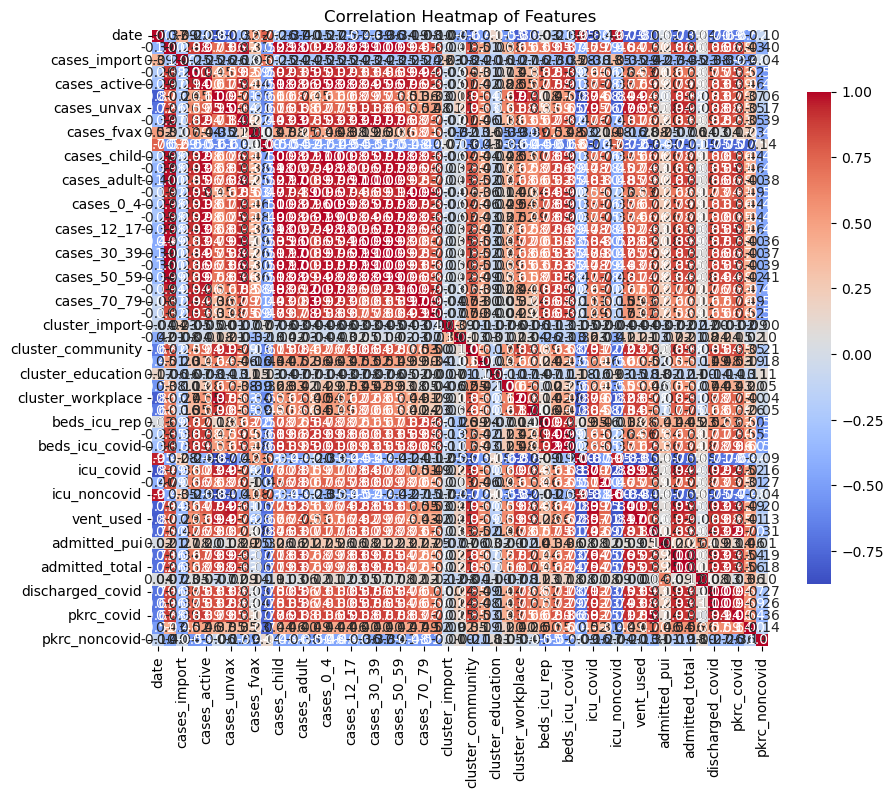

In [28]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()

From the heatmap, it can be clearly seen that the red color dominates the heatmap, indicating a high correlation (greater than 0.70) between many feature pairs.

### Drop Highly Correlated Features to mitigate the issue of multicollinearity

In [29]:
# Identify features to drop
to_drop = set()  # Set to hold features to drop

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]  # Get column name
            to_drop.add(colname)

# Drop the features from the DataFrame
X_reduced = X.drop(columns=to_drop)

new_correlation_matrix = X_reduced.corr()

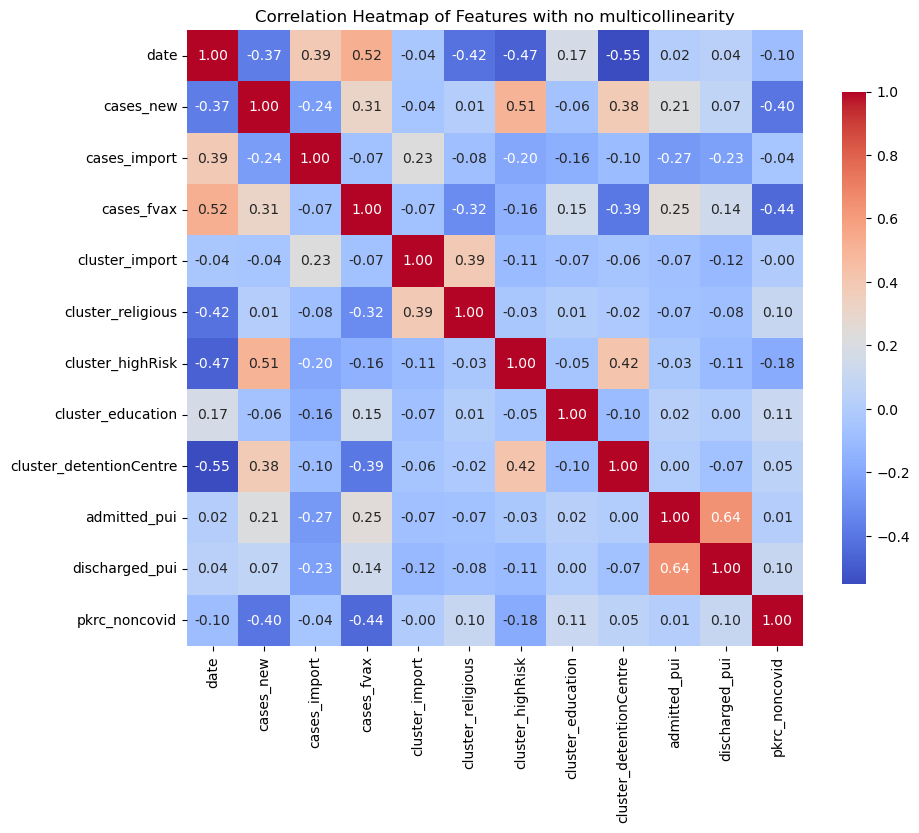

In [30]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(new_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Heatmap of Features with no multicollinearity')

# Show the plot
plt.show()

In [31]:
# Display result after dropping highly correlated features
X_reduced.head()

,date,cases_new,cases_import,cases_fvax,cluster_import,cluster_religious,cluster_highRisk,cluster_education,cluster_detentionCentre,admitted_pui,discharged_pui,pkrc_noncovid
0,2021-06-01,7105,2,123,0.0,201.0,22.0,33.0,0.0,43,49,228
1,2021-06-02,7703,2,142,0.0,145.0,16.0,24.0,54.0,55,44,228
2,2021-06-03,8209,64,138,54.0,197.0,3.0,22.0,5.0,81,32,218
3,2021-06-04,7748,2,122,0.0,83.0,4.0,70.0,2.0,45,41,220
4,2021-06-05,7452,8,122,0.0,148.0,17.0,8.0,66.0,50,57,213


In [32]:
# Identify the datatypes 
print(X_reduced.dtypes)

date                       datetime64[ns]
cases_new                           int64
cases_import                        int64
cases_fvax                          int64
cluster_import                    float64
cluster_religious                 float64
cluster_highRisk                  float64
cluster_education                 float64
cluster_detentionCentre           float64
admitted_pui                        int64
discharged_pui                      int64
pkrc_noncovid                       int64
dtype: object


## Exploratory Data Analysis
*Conducting data analysis and visualisation to comprehend the fundamental attributes of the data, reveal patterns, and discover relationships between variables.*

### (a)  Scatter plot
Relationship Between Admitted PUI and Discharged PUI

In [33]:
# Drop the 'date' column from the X_reduced dataframe.
X_reduced = X_reduced.drop(columns=['date'])

<Axes: xlabel='admitted_pui', ylabel='discharged_pui'>

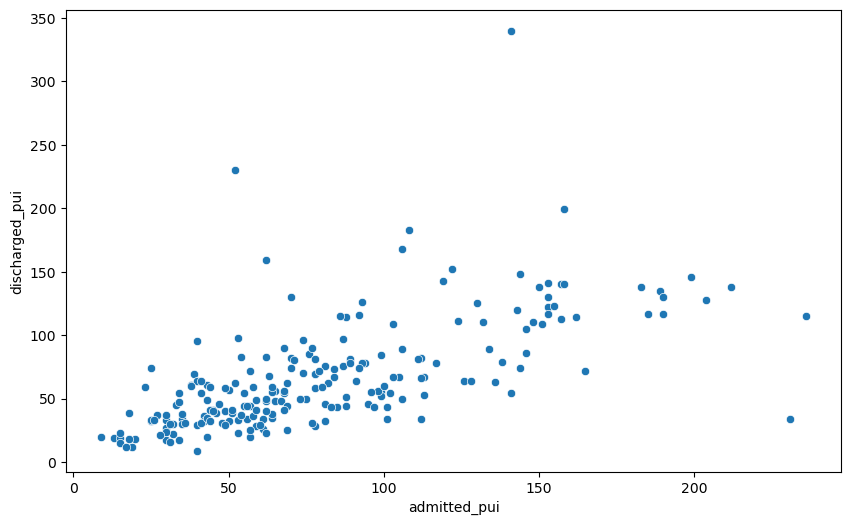

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='admitted_pui', y='discharged_pui', data=X_reduced)

### (b) Bar Chart
Comparison of different Clusters

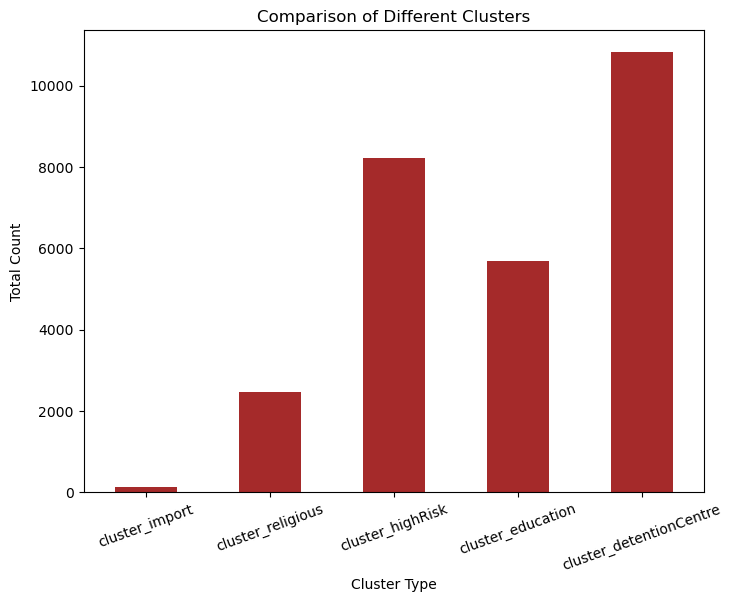

In [35]:
#Data visualisation
#Bar plot
cluster_columns = ['cluster_import', 'cluster_religious', 'cluster_highRisk', 
                   'cluster_education', 'cluster_detentionCentre']

cluster_sums = df[cluster_columns].sum()

plt.figure(figsize=(8,6))
cluster_sums.plot(kind='bar', color='Brown')
plt.xlabel('Cluster Type')
plt.ylabel('Total Count')
plt.title('Comparison of Different Clusters')
plt.xticks(rotation=20)
plt.show()


### (c) Line plot
Study the trends of cases over time

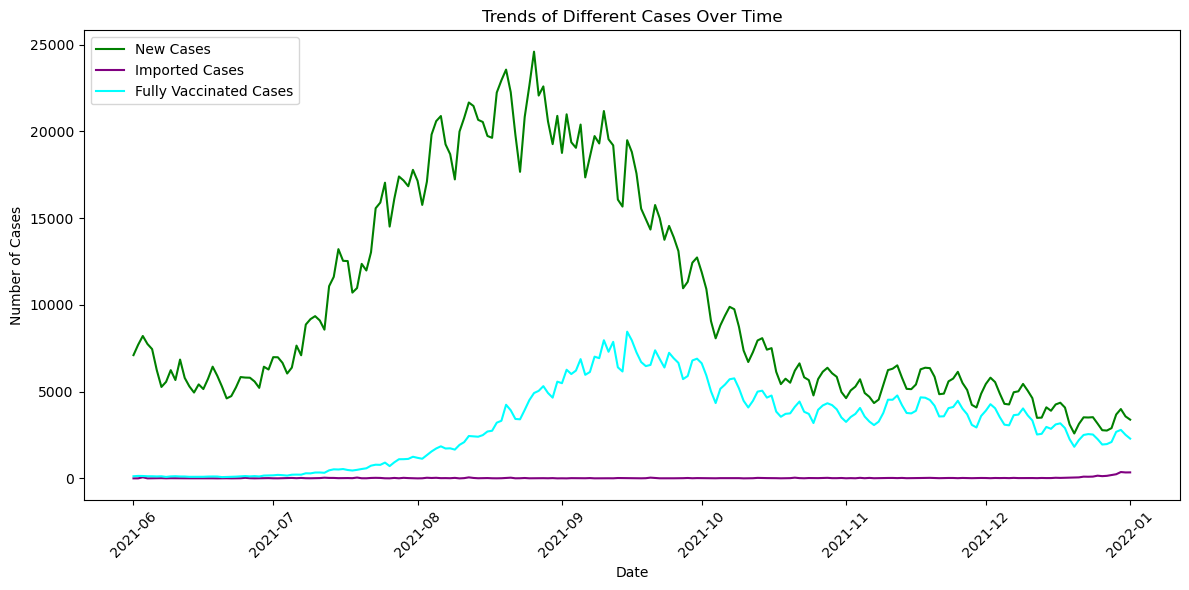

In [36]:
#Line plot of case trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['cases_new'], label='New Cases', color='green')
plt.plot(df['date'], df['cases_import'], label='Imported Cases', color='purple')
plt.plot(df['date'], df['cases_fvax'], label='Fully Vaccinated Cases', color='cyan')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Trends of Different Cases Over Time')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Standardization
*ensures that features contribute equally to the analysis by transforming them to a common scale.*

In [37]:
# Standardize the features (X_reduced)
scaler = StandardScaler()
X = scaler.fit_transform(X_reduced)

# Convert the standardized features back to a DataFrame
X = pd.DataFrame(X, columns=X_reduced.columns)

# Display the standardized features
print("Standardized Features:")
print(X)

Standardized Features:
     cases_new  cases_import  cases_fvax  cluster_import  cluster_religious  \
0    -0.497022     -0.483667   -1.334259       -0.148265           7.122784   
1    -0.400426     -0.483667   -1.325734       -0.148265           5.018337   
2    -0.318691      0.806048   -1.327529       12.794260           6.972467   
3    -0.393157     -0.483667   -1.334708       -0.148265           2.688414   
4    -0.440971     -0.358856   -1.334708       -0.148265           5.131075   
..         ...           ...         ...             ...                ...   
210  -1.176748      3.468685   -0.447625        0.331088          -0.430678   
211  -1.049784      4.446372   -0.185583        2.008822          -0.393098   
212  -0.999063      7.088207   -0.134431       -0.148265          -0.393098   
213  -1.067553      6.609765   -0.262311        0.570764          -0.355519   
214  -1.097759      6.672170   -0.361025        1.769146          -0.355519   

     cluster_highRisk  clust

In [38]:
# Train-test split with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Display the shapes of the training and testing sets
print("\nShapes of the datasets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shapes of the datasets:
X_train shape: (172, 11)
X_test shape: (43, 11)
y_train shape: (172,)
y_test shape: (43,)


# Supervised Learning Model

### Define performance evaluation

In [40]:
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=4):
    """
    Evaluate a machine learning model using cross-validation and performance metrics.
    
    Parameters:
    - model: The machine learning model to evaluate.
    - X_train: Training features.
    - y_train: Training target variable.
    - X_test: Testing features.
    - y_test: Testing target variable.
    - cv: Number of cross-validation folds (default is 4).
    
    Returns:
    - results: A dictionary containing MAE, MSE, R2, and cross-validated scores.
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)  # Convert to RMSE
    
    # Prepare results
    results = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'CV RMSE Mean': np.mean(cv_rmse),
        'CV RMSE Std': np.std(cv_rmse)
    }
    
    return results

### Defining Models for Comparison

In [41]:
# Import necessary models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import randint
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam, RMSprop
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

#### Multiple Regression

In [42]:
# Randomize Search CV of Multiple Regression
multipleRegression=LinearRegression()

# Define the parameter grid for RandomizedSearchCV
param_grid_mr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Set up the RandomizedSearchCV
rand_model_mr = RandomizedSearchCV(estimator=multipleRegression, param_distributions=param_grid_mr, n_iter=10, cv=5, random_state=42)

#### Neural Network

In [43]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Function to create a neural network model
def create_nn_model(optimizer='adam', learning_rate=0.001, units=64):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))

    optimizer_instance = Adam(learning_rate=learning_rate) if optimizer == 'adam' else RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer_instance, loss='mean_squared_error', metrics=['mse'])
    return model

In [44]:
# Hyperparameter tuning
# Define parameter grid for RandomizedSearchCV for Neural Network
param_grid_nn = {
    'model__units': [32, 64, 128, 256],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__learning_rate': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
}

# Wrap the model with KerasRegressor
nn_regressor = KerasRegressor(model=create_nn_model, verbose=0)

# Setting up RandomizedSearchCV for Neural Network
rand_model_nn = RandomizedSearchCV(estimator=nn_regressor, 
                                   param_distributions=param_grid_nn, 
                                   n_iter=50, cv=3, verbose=1, 
                                   random_state=42, n_jobs=-1)

#### Random Forest

In [45]:
#RandomizeSearchCV of Random Forest
randomForest = RandomForestRegressor(n_estimators=500)

# Defining the parameter grid
param_random = {
    'n_estimators': [100, 300, 500, 700, 1000, 1250],
    'max_depth': [5, 10, 20, 30, 40, 50, 60, None],
    'max_features': ['sqrt', 'log2', None, 0.5],
    'min_samples_split': [2, 3, 5, 6, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 6, 8],
    'bootstrap': [True, False]
}
# Setting up the RandomizedSearchCV
rand_model_rf = RandomizedSearchCV(estimator=randomForest, param_distributions=param_random, 
                                     n_iter=50, cv=3, verbose=2, n_jobs=-1, random_state=42)

#### XGBoost

In [46]:
xgBoost= XGBRegressor()

# Define the parameter grid for RandomizedSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Set up the RandomizedSearchCV
rand_model_xgb = RandomizedSearchCV(estimator=xgBoost, param_distributions=param_grid_xgb, n_iter=10, cv=5, random_state=42, n_jobs=-1)

#### Support Vector Regression

In [47]:
SVR = SVR()
# Define parameter grid for RandomizedSearchCV for SVR
param_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'C': [0.1, 1, 10, 100],  
    'epsilon': [0.01, 0.1, 0.2, 0.5]  
}

# Setting up the RandomizedSearchCV for SVR
rand_model_svr = RandomizedSearchCV(estimator=SVR, param_distributions=param_svr, 
                                     n_iter=50, cv=3, verbose=2, n_jobs=-1, random_state=42)

# (a) Multiple Regression

Multiple Regression Model without RandomizedSearchCV

Regression metrics of Multiple Regression on test set

MSE:  2938.943163126941
MAE:  40.27127413782848
R-squared:  0.7671730357944252

Multiple Regression Model with RandomizedSearchCV


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best parameters after tuning:  {'positive': True, 'fit_intercept': True, 'copy_X': True}
Best cross-validation score:  0.7254485519200793

Regression metrics of Multiple Regression on test set

MSE:  2816.43936994184
MAE:  39.13704381344402
R-squared:  0.7768779483047468


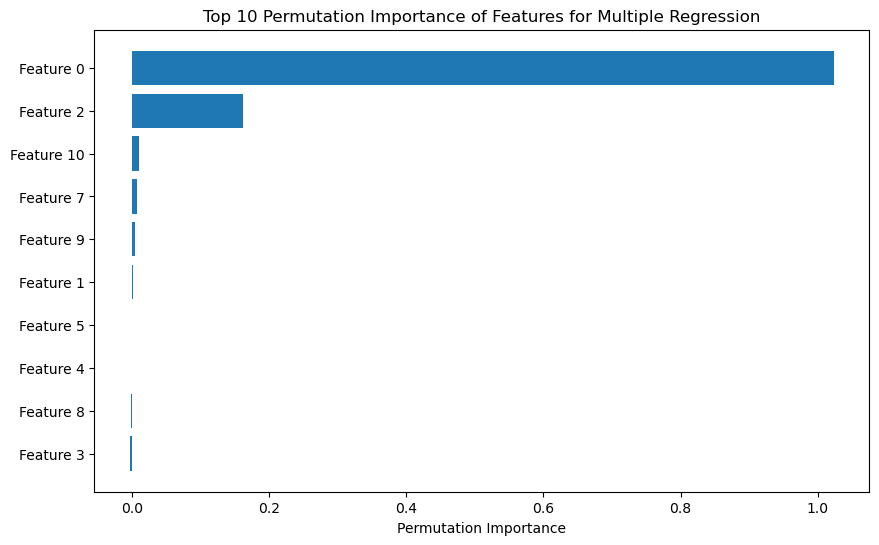

In [48]:
# Fit the Multiple Regression model without RandomizedSearchCV
print("Multiple Regression Model without RandomizedSearchCV")
multipleRegression.fit(X_train, y_train)

# Predictions on the test set
y_pred_mr = multipleRegression.predict(X_test)

# Regression metrics of Multiple Regression on test set
print("\nRegression metrics of Multiple Regression on test set\n")
print("MSE: ", mean_squared_error(y_test, y_pred_mr))
print("MAE: ", mean_absolute_error(y_test, y_pred_mr))
print("R-squared: ", r2_score(y_test, y_pred_mr))

# Train the Multiple Regression model with RandomizedSearchCV
print("\nMultiple Regression Model with RandomizedSearchCV")
rand_model_mr.fit(X_train, y_train)
print("\nBest parameters after tuning: ", rand_model_mr.best_params_)
print("Best cross-validation score: ", rand_model_mr.best_score_)

# Predictions of Multiple Regression on test set with RandomizedSearchCV
rand_y_pred_mr = rand_model_mr.predict(X_test)

# Regression metrics of Multiple Regression on test set with RandomizedSearchCV
print("\nRegression metrics of Multiple Regression on test set\n")
print("MSE: ", mean_squared_error(y_test, rand_y_pred_mr))
print("MAE: ", mean_absolute_error(y_test, rand_y_pred_mr))
print("R-squared: ", r2_score(y_test, rand_y_pred_mr))

# Calculate permutation importance
result = permutation_importance(multipleRegression, X_test, y_test, n_repeats=30, random_state=42)

# Get the top 10 features
sorted_idx = np.argsort(result.importances_mean)[-10:]

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(range(10), result.importances_mean[sorted_idx])
plt.yticks(range(10), [f'Feature {i}' for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Top 10 Permutation Importance of Features for Multiple Regression")
plt.show()


## (b) Neural Network

Neural Network Model without RandomizedSearchCV
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Regression metrics of Neural Network on test set

MSE:  3801.895193749818
MAE:  39.64094672092172
R-squared:  0.6988089084625244

Neural Network Model with RandomizedSearchCV
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameters after tuning:  {'model__units': 64, 'model__optimizer': 'rmsprop', 'model__learning_rate': 0.001, 'epochs': 200, 'batch_size': 64}
Best cross-validation score:  0.7264328002929688

Regression metrics of Neural Network on test set

MSE:  3174.3259720618385
MAE:  36.96660964433537
R-squared:  0.7485256791114807


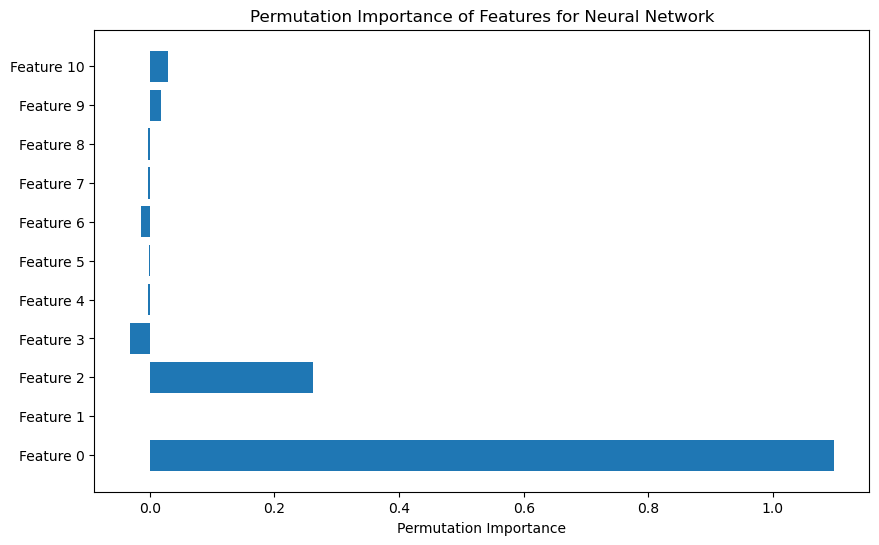

In [49]:
# Fit the Neural Network model without RandomizedSearchCV
print("Neural Network Model without RandomizedSearchCV")
nn_model = create_nn_model()
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Predictions on the test set
y_pred_nn = nn_model.predict(X_test).flatten()

# Regression metrics of Neural Network on test set
print("\nRegression metrics of Neural Network on test set\n")
print("MSE: ", mean_squared_error(y_test, y_pred_nn))
print("MAE: ", mean_absolute_error(y_test, y_pred_nn))
print("R-squared: ", r2_score(y_test, y_pred_nn))

# Train the Neural Network model with RandomizedSearchCV
print("\nNeural Network Model with RandomizedSearchCV")
rand_model_nn.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_nn.best_params_)
print("Best cross-validation score: ", rand_model_nn.best_score_)

# Predictions on the test set with RandomizedSearchCV
rand_y_pred_nn = rand_model_nn.predict(X_test)

# Regression metrics of Neural Network on test set with RandomizedSearchCV
print("\nRegression metrics of Neural Network on test set\n")
print("MSE: ", mean_squared_error(y_test, rand_y_pred_nn))
print("MAE: ", mean_absolute_error(y_test, rand_y_pred_nn))
print("R-squared: ", r2_score(y_test, rand_y_pred_nn))

# Calculate permutation importance for the Neural Network model
result_nn = permutation_importance(rand_model_nn, X_test, y_test, n_repeats=30, random_state=42)

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), result_nn.importances_mean)
plt.yticks(range(X_train.shape[1]), [f'Feature {i}' for i in range(X_train.shape[1])])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features for Neural Network")
plt.show()

## (c) Random Forest

Model without RandomizedSearchCV

Regression  of test set

MSE:  1294.4922386976743
MAE:  23.967162790697675
R-squared:  0.8974486128534089

Model with RandomizedSearchCV
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameter after tuning:  {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 0.5, 'max_depth': 5, 'bootstrap': False}
Best cross validation score:  0.7955273505192055
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Regression  of test set

MSE:  1606.007677426755
MAE:  28.717890315111248
R-squared:  0.8727699478106693


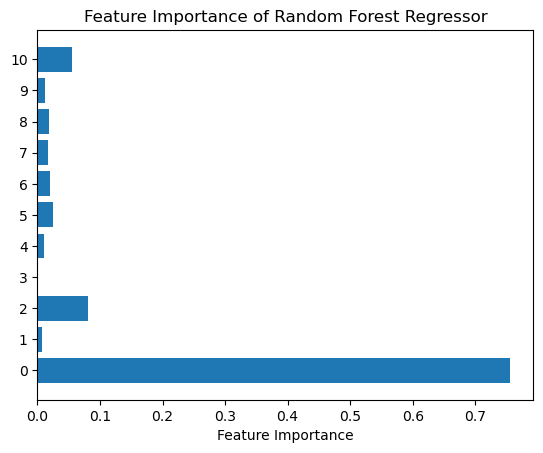

In [53]:
# Random Forest without RandomizedSearchCV
print("Model without RandomizedSearchCV")
randomForest.fit(X_train, y_train)

# Predictions of Random Forest on test set
y_pred_model_rf = randomForest.predict(X_test)

# Regression metrics of Random Forest on testing set
print("\nRegression  of test set\n")
print("MSE: ", mean_squared_error(y_test, y_pred_model_rf))
print("MAE: ", mean_absolute_error(y_test,y_pred_model_rf))
print("R-squared: ", r2_score(y_test, y_pred_model_rf))

# Train the model on training set with RandomizedSearchCV
print("\nModel with RandomizedSearchCV")
rand_model_rf.fit(X_train, y_train)
print("\nBest parameter after tuning: ", rand_model_rf.best_params_)
print("Best cross validation score: ", rand_model_rf.best_score_)

# Fitting the model
rand_model_rf.fit(X_train, y_train)

# Predictions of Random Forest on validation set with RandomizedSearchCV
rand_y_pred_model_rf = rand_model_rf.predict(X_test)

# Regression metrics of Random Forest on testing set with RandomizedSearchCV
print("\nRegression  of test set\n")
print("MSE: ", mean_squared_error(y_test, rand_y_pred_model_rf))
print("MAE: ", mean_absolute_error(y_test, rand_y_pred_model_rf))
print("R-squared: ", r2_score(y_test, rand_y_pred_model_rf))

#Plot the bar graph
plt.barh(range(X_train.shape[1]), randomForest.feature_importances_)
plt.yticks(range(X_train.shape[1]))
plt.xlabel("Feature Importance")
plt.title("Feature Importance of Random Forest Regressor")
plt.show()

# (d) XG Boost

XGBoost Model without RandomizedSearchCV

Regression metrics of XGBoost on test set

MSE:  1466.1177410351563
MAE:  25.35426059989042
R-squared:  0.8838522434234619

XGBoost Model with RandomizedSearchCV


C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best parameters after tuning:  {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best cross-validation score:  0.8112181663513184

Regression metrics of XGBoost on test set

MSE:  1457.2616346128927
MAE:  27.890821856121683
R-squared:  0.8845537900924683


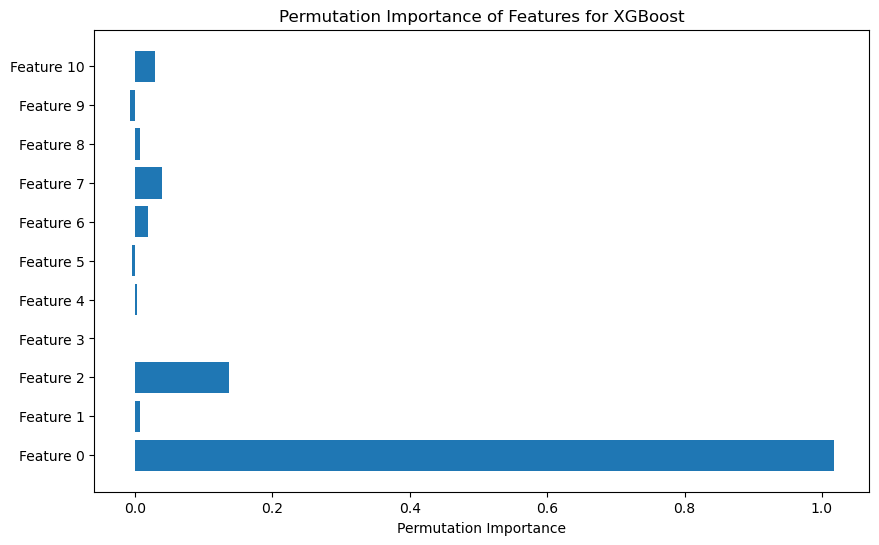

In [51]:
# Fit the XGBoost model without RandomizedSearchCV
print("XGBoost Model without RandomizedSearchCV")
xgBoost.fit(X_train, y_train)

# Predictions on the test set
y_pred_xgb = xgBoost.predict(X_test)

# Regression metrics of XGBoost on test set
print("\nRegression metrics of XGBoost on test set\n")
print("MSE: ", mean_squared_error(y_test, y_pred_xgb))
print("MAE: ", mean_absolute_error(y_test, y_pred_xgb))
print("R-squared: ", r2_score(y_test, y_pred_xgb))

# Predictions of XGBoost on test set with RandomizedSearchCV
print("\nXGBoost Model with RandomizedSearchCV")
rand_model_xgb.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_xgb.best_params_)
print("Best cross-validation score: ", rand_model_xgb.best_score_)

# Regression metrics of XGBoost on test set with RandomizedSearchCV
rand_y_pred_xgb = rand_model_xgb.predict(X_test)
print("\nRegression metrics of XGBoost on test set\n")
print("MSE: ", mean_squared_error(y_test, rand_y_pred_xgb))
print("MAE: ", mean_absolute_error(y_test, rand_y_pred_xgb))
print("R-squared: ", r2_score(y_test, rand_y_pred_xgb))

# Calculate permutation importance for the XGBoost model
result_xgb = permutation_importance(rand_model_xgb, X_test, y_test, n_repeats=30, random_state=42)

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(range(11), result_xgb.importances_mean[:11])
plt.yticks(range(11), [f'Feature {i}' for i in range(11)])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features for XGBoost")
plt.show()


## (e) Support Vector Regression

SVR Model without RandomizedSearchCV

Regression metrics of SVR on test set

MSE:  12344.320005564301
MAE:  75.70219745243774
R-squared:  0.022066643500604166

SVR Model with RandomizedSearchCV
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameters after tuning:  {'kernel': 'rbf', 'epsilon': 0.5, 'C': 100}
Best cross-validation score:  0.7291754930585613

Regression metrics of SVR on test set

MSE:  3183.051221430774
MAE:  37.30887004339561
R-squared:  0.7478344725768472


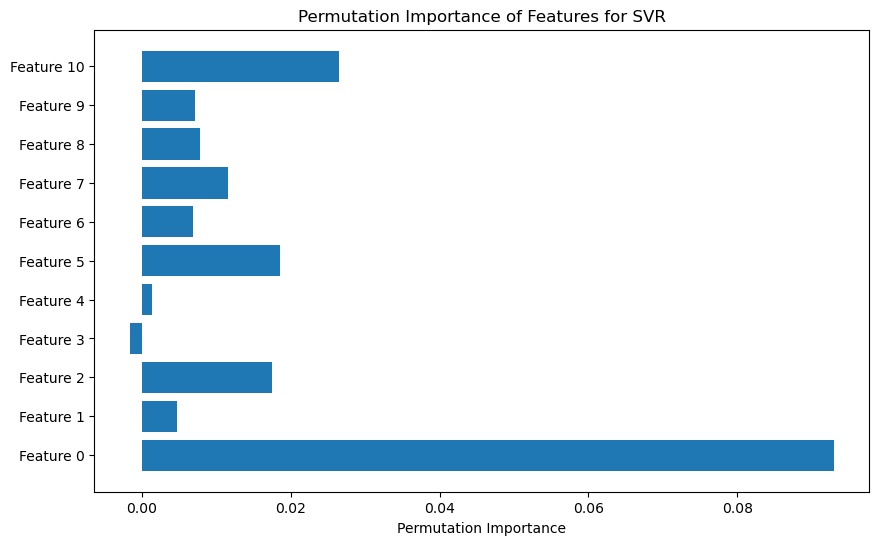

In [52]:
# Fit the SVR model without RandomizedSearchCV
print("SVR Model without RandomizedSearchCV")
SVR.fit(X_train, y_train)  

# Predictions on the test set
y_pred_svr = SVR.predict(X_test)  

# Regression metrics of SVR on testing set
print("\nRegression metrics of SVR on test set\n")
print("MSE: ", mean_squared_error(y_test, y_pred_svr))
print("MAE: ", mean_absolute_error(y_test, y_pred_svr))
print("R-squared: ", r2_score(y_test, y_pred_svr))

# Train the model with RandomizedSearchCV
print("\nSVR Model with RandomizedSearchCV")
rand_model_svr.fit(X_train, y_train)
print("\nBest parameters after tuning: ", rand_model_svr.best_params_)
print("Best cross-validation score: ", rand_model_svr.best_score_)

# Predictions of SVR on validation set with RandomizedSearchCV
rand_y_pred_svr = rand_model_svr.predict(X_test)

# Regression metrics of SVR on testing set with RandomizedSearchCV
print("\nRegression metrics of SVR on test set\n")
print("MSE: ", mean_squared_error(y_test, rand_y_pred_svr))
print("MAE: ", mean_absolute_error(y_test, rand_y_pred_svr))
print("R-squared: ", r2_score(y_test, rand_y_pred_svr))

# Calculate permutation importance
result = permutation_importance(SVR, X_test, y_test, n_repeats=30, random_state=42)

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), result.importances_mean)
plt.yticks(range(X_train.shape[1]), [f'Feature {i}' for i in range(X_train.shape[1])])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features for SVR")
plt.show()